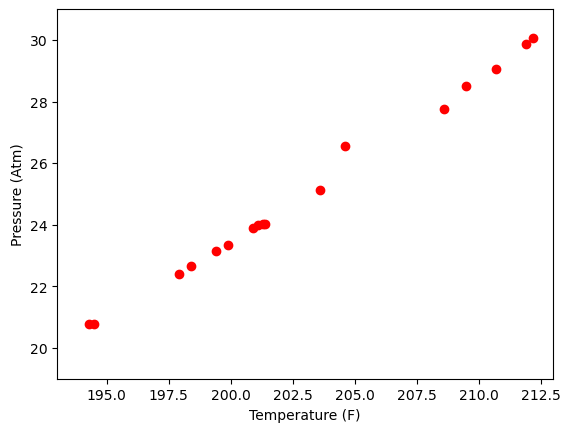

In [2]:
# Vd 1.b:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


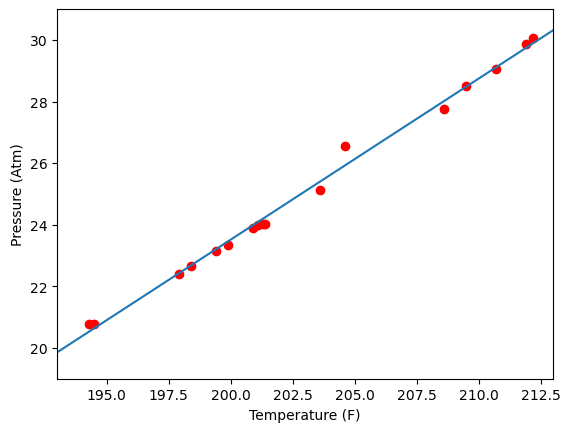

In [3]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [35]:
# Vd 2: Đọc dl từ tệp
import math
import numpy as np
with open('D:/Code/python/mat3533/practice02/data/fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)
print(x_data)

[[1.80000000e+01 1.03138007e+03 2.34710000e+04 1.65271104e+01]
 [8.00000000e+00 1.03164106e+03 3.00640000e+04 1.37342862e+01]
 [1.80000000e+01 9.08597153e+02 2.55780000e+04 1.57535563e+01]
 [2.17000000e+01 9.46570576e+02 2.22570000e+04 1.65824360e+01]
 [1.80000000e+01 8.44703336e+02 3.22750000e+04 1.73647075e+01]
 [2.20000000e+01 9.89606180e+02 3.29490000e+04 1.63895977e+01]
 [2.50000000e+01 9.99593430e+02 4.06400000e+04 1.43519054e+01]
 [2.30000000e+01 9.24344838e+02 3.12550000e+04 1.25053154e+01]
 [2.00000000e+01 7.00195273e+02 3.73830000e+04 1.05830828e+01]
 [1.36000000e+01 1.00012416e+03 2.81450000e+04 1.68398312e+01]
 [7.50000000e+00 9.33302595e+02 2.79400000e+04 1.68179580e+01]
 [1.60000000e+01 8.29997134e+02 2.82210000e+04 1.20627208e+01]
 [2.50000000e+01 9.25193414e+02 2.41800000e+04 1.54990361e+01]
 [1.90000000e+01 8.19436731e+02 3.22590000e+04 1.70780570e+01]
 [1.50000000e+01 8.79235228e+02 2.70110000e+04 1.65209562e+01]
 [2.00000000e+01 8.67490690e+02 2.67230000e+04 1.679153

In [5]:
# Vd 2.a : Sử dụng Numpy
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

def linear_regression(x_data, y_data):
# """
# This function calculate linear regression base on x_data and y_data
# :param x_data: vector
# :param y_data: vector
# :return: w (regression estimate)
# """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [6]:
# Lệnh gọi & chạy chương trình
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457730998
                 Tax: -4.227983208329613
                Dlic: 0.4718712134419817
              Income: -0.006135330970417635
            LogMiles: 18.54527450604798


In [7]:
# Vd 2.b: Sử dụng Scikit-Learn
from sklearn import datasets, linear_model
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

LinearRegression(fit_intercept=False)

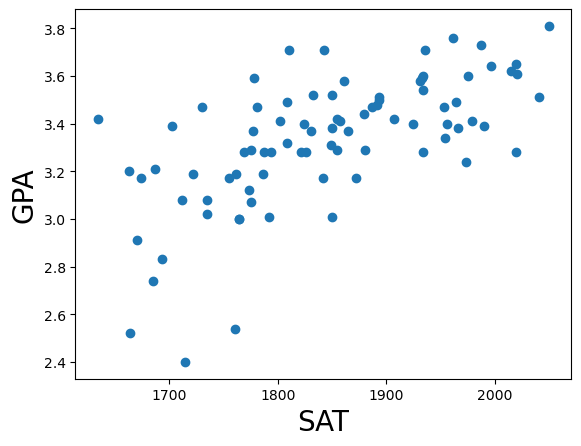

In [8]:
# Vd 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Change to data path on your computer
data = pd.read_csv("D:/Code/python/mat3533/practice02/data/SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [10]:
# Nếu đã có hệ số t_0, t_1 , đoạn code dùng để vẽ ra đường hồi quy tuyến tính
# plt.scatter(x1,y)
# yhat = t_1*x1 + t_0
# fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
# plt.xlabel('SAT', fontsize = 20)
# plt.ylabel('GPA', fontsize = 20)
# plt.show()

In [1]:
import numpy as np
import pandas as pd

In [2]:
def read_data(path: str):
    with open(path, "r") as f:
        lines = f.readlines()
        lines = [x.strip() for x in lines if not x.startswith("I") and not x == "\n" ]
        data = [x.split(" ") for x in lines]
        data = np.array(data).astype(float)
        data = pd.DataFrame(data)
    return data

In [5]:
data = read_data("D:/Code/python/mat3533/practice02/data/vidu3_lin_reg.txt")
print(data)

        0     1     2      3     4     5     6
0     1.0  56.0  21.0  160.0  14.0  6.00  1.95
1     2.0  76.0  18.0  150.0  12.0  4.97  1.33
2     3.0  63.0  16.0  160.0   4.4  6.39  0.83
3     4.0  78.0  20.0  100.0   4.0  7.00  2.00
4     5.0  87.0  20.0  110.0   4.6  4.10  1.30
..    ...   ...   ...    ...   ...   ...   ...
95   96.0  55.0  24.0  160.0   5.0  7.20  0.90
96   97.0  76.0  15.0  140.0   3.1  5.24  1.16
97   98.0  70.0  25.0  180.0   4.0  4.40  1.00
98   99.0  85.0  21.0  160.0   5.2  5.20  0.97
99  100.0  87.0  22.0  130.0   9.0  5.20  2.30

[100 rows x 7 columns]


In [6]:
x = data.drop([0, 6], axis = 1)
y = data[6]
x = np.array(x)
y = np.array([y]).T
print(x)
print(y)

[[ 56.    21.   160.    14.     6.  ]
 [ 76.    18.   150.    12.     4.97]
 [ 63.    16.   160.     4.4    6.39]
 [ 78.    20.   100.     4.     7.  ]
 [ 87.    20.   110.     4.6    4.1 ]
 [ 76.    19.   150.     4.6    2.74]
 [ 55.    31.   160.     5.5    4.6 ]
 [ 74.    22.   100.     6.8    5.04]
 [ 81.    21.   120.     5.8    4.75]
 [ 77.    24.   160.     5.4    6.94]
 [ 29.    20.   120.     3.8    4.84]
 [ 71.    22.   160.     3.3    6.63]
 [ 77.    21.   160.     5.1    4.93]
 [ 59.    18.   150.     6.     4.55]
 [ 58.    27.   130.     6.9    6.7 ]
 [ 34.    19.   130.     4.5    3.2 ]
 [ 74.    22.   100.    10.6    4.3 ]
 [ 61.    19.   170.    18.     6.8 ]
 [ 53.    20.   130.    25.     5.5 ]
 [ 65.    28.   140.     6.5    6.8 ]
 [ 80.    19.   160.     4.8    5.74]
 [ 71.    25.   160.     6.2    6.9 ]
 [ 90.    24.   160.     4.7    7.  ]
 [ 44.    24.   120.     6.     3.4 ]
 [ 91.    27.   150.     6.1    4.92]
 [ 75.    22.   160.     6.2    6.08]
 [ 60.    24

In [7]:
x_train = x[:80]
y_train = y[:80]
x_test = x[80:]
y_test = y[80:]

In [8]:
one = np.array([np.ones(len(x_train))]).T
xbar = np.concatenate((one, x_train), axis=1)
A = np.dot(xbar.T, xbar)
b = np.dot(xbar.T, y_train)
w = np.dot(np.linalg.pinv(A), b)
print(w)

[[ 0.04306436]
 [ 0.0089892 ]
 [-0.00047742]
 [ 0.00260218]
 [ 0.00808634]
 [ 0.00708535]]
